# 計算物理３ 自由課題 : BlackHoleCamera

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
def bh_plt(filename, a):
    df_data = pd.read_csv(filename, names=("r","theta","phi"))
    df_data = pd.DataFrame(df_data.query("theta > 1.56 and theta < 1.58"))
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    c1 = pat.Circle(xy=(0, 0), radius=2.0, fc='black', ec='black')
    c2 = pat.Circle(xy=(0, 0), radius=3.5, ec='black', fill=False, linestyle='dashed')
    ax.add_patch(c1)
    ax.add_patch(c2)

    r = np.sqrt(df_data['r']*df_data['r'] + a*a)
    ax.scatter(x = r * np.sin(df_data['theta']) * np.cos(df_data['phi']),
                y = r * np.sin(df_data['theta']) * np.sin(df_data['phi']), 
                s = 0.8,
                c = color_cycle[4])

    ax.set_title('The light orbits around a Kerr BH\n'\
                     '(Schwarzschild radius $r_s = 1.0$), L/M = 0.998')
    ax.set_xlabel('$x \, / \, r_s$')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set_ylabel('$y \, / \, r_s$')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.grid(True)
    
bh_plt("../data/output11.csv", 0.998)
bh_plt("../data/output12.csv", 0.998)

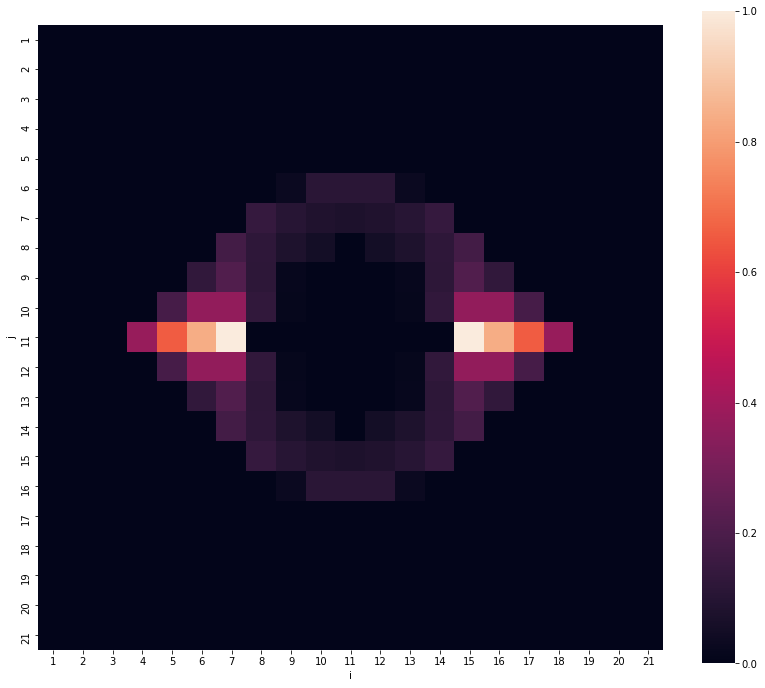

In [4]:
filename = "../data/output.csv"

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111)

df = pd.read_csv(filename, names=("i", "j", "intensity"))
df["intensity"] = df["intensity"]/df["intensity"].max()
df = df.pivot(index='j', columns='i', values='intensity')

sns.heatmap(df, square=True, vmax=1, vmin=0)
plt.savefig("a0.png", format="png", dpi=200)